In [14]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# PCA module
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score
import datetime

In [ ]:
# Save Memory
# Read CSV in chunksize
# drop irrelevant columns
# change data type

# data used
#'yellow_tripdata_2018-12.csv'
#'taxi_zones.csv'
#'yellow_airport_pickup' is processed to get only data from airport dropoff

In [4]:

yellow_12_2018 = pd.read_csv('yellow_tripdata_2018-12.csv')
yellow_12_2018.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-12-01 00:28:22,2018-12-01 00:44:07,2,2.5,1,N,148,234,1,12.0,0.5,0.5,3.95,0.0,0.3,17.25
1,1,2018-12-01 00:52:29,2018-12-01 01:11:37,3,2.3,1,N,170,144,1,13.0,0.5,0.5,2.85,0.0,0.3,17.15
2,2,2018-12-01 00:12:52,2018-12-01 00:36:23,1,0.0,1,N,113,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
3,1,2018-12-01 00:35:08,2018-12-01 00:43:11,1,3.9,1,N,95,92,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55
4,1,2018-12-01 00:21:54,2018-12-01 01:15:13,1,12.8,1,N,163,228,1,45.0,0.5,0.5,9.25,0.0,0.3,55.55


In [2]:
taxi_zone = pd.read_csv('taxi_zones.csv')
taxi_zone[taxi_zone.zone.str.contains('Airport$')]

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
136,132,0.245479,MULTIPOLYGON (((-73.8250346749999 40.663580133...,0.002038,JFK Airport,132,Queens
145,138,0.107467,MULTIPOLYGON (((-73.8712485624251 40.786038151...,0.000537,LaGuardia Airport,138,Queens


In [14]:
# Location ID    Newark Airport:1  JFK: 132   LaGuardia: 138 

In [5]:
ind = (yellow_12_2018['PULocationID'] == 1)|(yellow_12_2018['PULocationID'] == 132)|(yellow_12_2018['PULocationID'] == 138)
yellow_airport_pickup = yellow_12_2018[ind]
yellow_airport_pickup.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
5,1,2018-12-01 00:00:38,2018-12-01 00:29:26,1,18.80,1,N,132,97,1,50.5,0.5,0.5,10.35,0.00,0.3,62.15
10,1,2018-12-01 00:56:42,2018-12-01 01:22:35,1,17.30,2,N,132,170,1,52.0,0.0,0.5,10.00,5.76,0.3,68.56
67,2,2018-12-01 00:45:47,2018-12-01 01:14:10,1,19.27,1,N,132,66,1,51.5,0.5,0.5,10.56,0.00,0.3,63.36
71,1,2018-12-01 00:11:13,2018-12-01 00:48:13,1,20.00,2,N,132,166,1,52.0,0.0,0.5,5.86,5.76,0.3,64.42
112,1,2018-12-01 00:17:21,2018-12-01 00:32:00,2,8.00,1,N,138,162,2,23.0,0.5,0.5,0.00,5.76,0.3,30.06


In [ ]:
yellow_airport_pickup.to_csv('yellow_airport_pickup.csv')

In [3]:
yellow_airport_pickup = pd.read_csv('yellow_airport_pickup.csv')

In [19]:
yellow_airport_pickup['dropoff_hour'] = [x[14:16] for x in yellow_airport_pickup['tpep_dropoff_datetime']]
yellow_airport_pickup['dropoff_day'] = [x[0:4]+x[5:7]+x[8:10] for x in yellow_airport_pickup['tpep_dropoff_datetime']]
yellow_airport_pickup['dropoff_hour']=yellow_airport_pickup['dropoff_hour'].astype(int)
yellow_airport_pickup['dropoff_day']=yellow_airport_pickup['dropoff_day'].astype(int)

In [22]:
yellow_airport_pickup.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dropoff_hour               int64
dropoff_day                int64
dtype: object

In [27]:
# extract date 20181218 to 20181231
ind = (yellow_airport_pickup['dropoff_day'] >= 20181218) & (yellow_airport_pickup['dropoff_day'] <= 20181231)
Holiday_dropoff = yellow_airport_pickup[ind]
Holiday_dropoff.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dropoff_hour,dropoff_day
199917,4042339,2,2018-12-27 16:48:57,2018-12-27 17:13:28,1,8.92,1,N,138,244,2,28.0,1.0,0.5,0.00,5.76,0.3,35.56,13,20181227
225716,4702602,2,2018-12-17 00:07:40,2018-12-18 00:00:00,1,12.38,1,N,132,180,2,37.0,0.5,0.5,0.00,0.00,0.3,38.30,0,20181218
225907,4704256,2,2018-12-17 00:33:42,2018-12-18 00:13:33,4,20.87,2,N,132,229,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,13,20181218
226510,4713633,2,2018-12-17 05:37:43,2018-12-18 05:14:42,1,17.77,2,N,132,186,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27,14,20181218
227138,4729738,2,2018-12-17 07:24:12,2018-12-18 07:07:33,1,16.35,1,N,138,88,1,47.0,0.0,0.5,10.71,5.76,0.3,64.27,7,20181218


In [24]:
tzs=gpd.read_file('taxi_zones/taxi_zones.shp')
tzs.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [28]:
# which zones have most drop off in the given time interval? Aggregate by passenger count sum
Holiday_sum_agg = Holiday_dropoff.groupby('DOLocationID').sum()
# merge with taxi zone
tzs_yellow_Holiday =tzs.merge(Holiday_sum_agg, left_on = 'LocationID', right_on ='DOLocationID' )

/Applications/anaconda3/lib/python2.7/site-packages/geopandas/plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


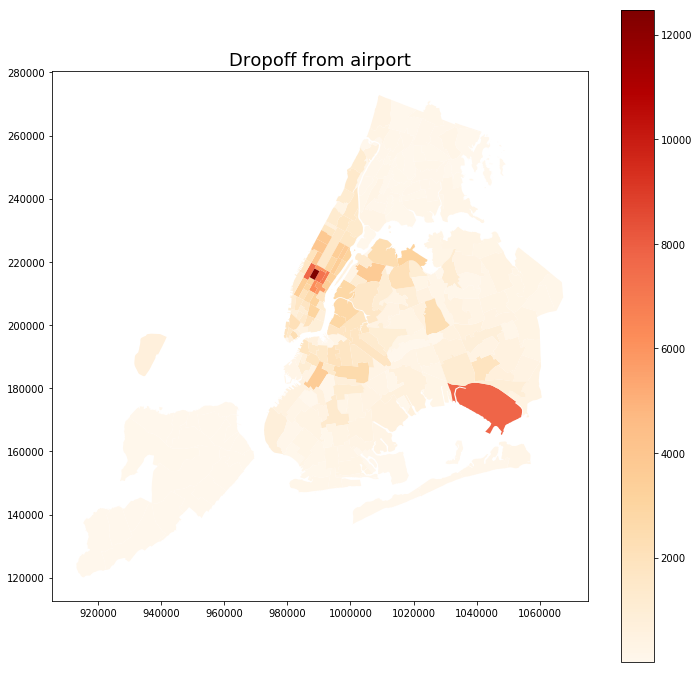

In [29]:
f,ax = plt.subplots(1, figsize=(12,12))
ax.set_title('Dropoff from airport', fontsize=18)
tzs_yellow_Holiday.plot(axes=ax, column = 'passenger_count', legend = True, cmap = "OrRd")


In [30]:
# Top 10 dropoff Locations
tzs_yellow_Holiday.nlargest(10,'passenger_count')[['passenger_count','LocationID','zone','borough']]

,passenger_count,LocationID,zone,borough
222,12469,230,Times Sq/Theatre District,Manhattan
125,7769,132,JFK Airport,Queens
46,7655,48,Clinton East,Manhattan
154,7285,161,Midtown Center,Manhattan
155,6967,162,Midtown East,Manhattan
157,6252,164,Midtown South,Manhattan
156,5958,163,Midtown North,Manhattan
163,5715,170,Murray Hill,Manhattan
231,4004,239,Upper West Side South,Manhattan
135,3855,142,Lincoln Square East,Manhattan


In [6]:
FHV = pd.read_csv('fhv_tripdata_2018-12.csv')

In [7]:
FHV.head()

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Dispatching_base_number,Dispatching_base_num
0,2018-12-27 11:34:53,2018-12-27 11:50:29,NaN,NaN,NaN,B03035,NaN
1,2018-12-27 11:35:11,2018-12-27 11:40:35,NaN,NaN,NaN,B03035,NaN
2,2018-12-27 11:35:12,2018-12-27 12:00:54,NaN,NaN,NaN,B03035,NaN
3,2018-12-02 08:42:00,2018-12-02 08:49:00,NaN,NaN,NaN,B00054,NaN
4,2018-12-27 11:35:31,2018-12-27 11:55:37,NaN,NaN,NaN,B03035,NaN


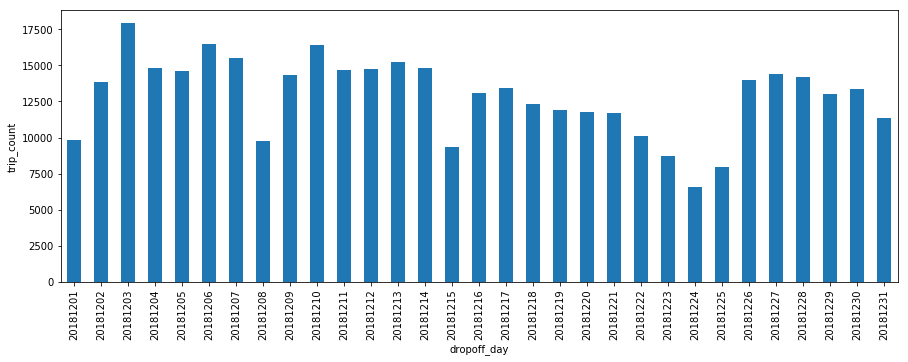

In [40]:
# Count number of trips from airport in December

ind = (yellow_airport_pickup['dropoff_day'] >= 20181201) & (yellow_airport_pickup['dropoff_day'] <= 20181231)

day_count = yellow_airport_pickup[ind]
day_count = day_count.groupby('dropoff_day').count().dropoff_hour
day_count.rename(columns={'dropoff_day':'trip_count'})
ax = day_count.plot(x='dropoff_day', y='trip_count', kind='bar', style="-o", figsize=(15,5))
ax.set_ylabel("trip_count")
plt.show()